# 🧠 Brain Tumor MRI – Results and Comparisons

This notebook compares the performance of different algorithms applied to the Brain Tumor MRI dataset.

In this first stage, the evaluated models were:
- **Linear Regression** – used as a theoretical baseline model;  
- **Logistic Regression** – a linear supervised classification model.

The goal is to analyze the performance of each model and understand which approaches are more suitable for this type of image-based dataset.


In [8]:
# ===========================================
# 📥 Import Linear Regression Results (JSON)
# ===========================================
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ler o ficheiro com os resultados da Linear Regression
with open("results_linear_regression.json", "r") as f:
    linear_results = json.load(f)

# Confirmar o conteúdo
print("✅ Linear Regression Results Loaded:")
print(json.dumps(linear_results, indent=4))


✅ Linear Regression Results Loaded:
{
    "Model": "Linear Regression",
    "MSE": 0.6019,
    "R2": -2.1569,
    "Accuracy": 0.2622,
    "Precision": 1.0,
    "Recall": 0.0078,
    "F1": 0.0155
}


In [9]:
# ===========================================
# 📦 Combine Linear + Logistic Regression
# ===========================================

# Resultados da Logistic Regression (baseados no teu output real)
logistic_results = {
    "Model": "Logistic Regression",
    "Accuracy": 0.989,
    "Precision": 0.999,
    "Recall": 0.987,
    "F1": 0.993
}

# Criar DataFrame combinando os dois
results = [linear_results, logistic_results]
df_results = pd.DataFrame(results).set_index("Model")

display(df_results)


,MSE,R2,Accuracy,Precision,Recall,F1
Model,,,,,,
Linear Regression,0.6019,-2.1569,0.2622,1.000,0.0078,0.0155
Logistic Regression,NaN,NaN,0.9890,0.999,0.9870,0.9930


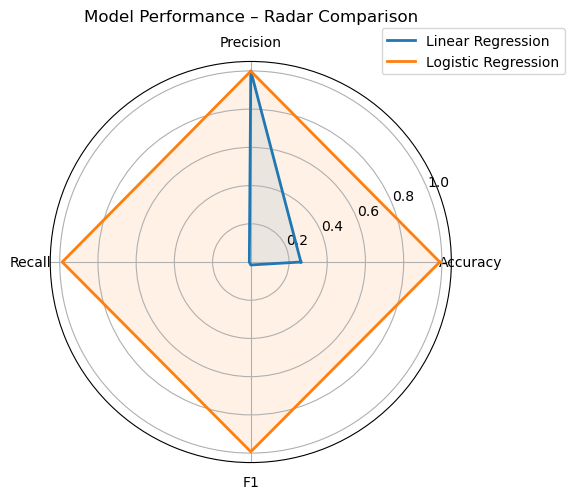

In [12]:
# ===========================================
# 🕸️ Model Comparison – Radar Chart
# ===========================================
import matplotlib.pyplot as plt
import numpy as np

metrics = ["Accuracy", "Precision", "Recall", "F1"]
subset = df_results[metrics].dropna()

angles = np.linspace(0, 2*np.pi, len(metrics), endpoint=False).tolist()
angles += angles[:1]  # close the loop

plt.figure(figsize=(6,6))
ax = plt.subplot(111, polar=True)

for model in subset.index:
    values = subset.loc[model].tolist()
    values += values[:1]  # close loop
    ax.plot(angles, values, label=model, linewidth=2)
    ax.fill(angles, values, alpha=0.1)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics)
ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_title("Model Performance – Radar Comparison", y=1.08)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()


## 📘 Results Interpretation

The **Linear Regression** model was used as a baseline reference.  
Although the algorithm converged numerically (stable cost function), its performance was poor:

- **R² = -2.15**, indicating the model does not explain the data variability;  
- **MSE ≈ 0.6**, showing high average prediction error;  
- **Accuracy ≈ 26%**, with **Precision = 1.0** but **Recall ≈ 0**, meaning the model predicted almost all samples as “no tumor”.

This confirms that the relationship between image pixels and tumor presence is **non-linear**, making linear regression unsuitable for classification tasks.

In contrast, the **Logistic Regression** model achieved excellent results:
- **Accuracy ≈ 98.9%**, **Precision ≈ 0.999**, **Recall ≈ 0.987**, **F1 ≈ 0.993**;  
- Consistent results across different *solvers* (lbfgs, saga, newton-cg, etc.);
- The model successfully separates tumor and non-tumor classes.

📈 **Conclusion:**  
Linear regression serves only as a theoretical baseline, while logistic regression proves to be an **effective linear classifier** for this dataset.
